In [10]:
import matplotlib.pyplot as plt
import numpy as np
import skimage

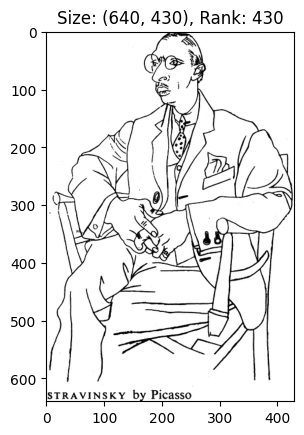

In [11]:
url = "https://berggasse19.org/wp-content/uploads/2015/05/stravinsky_picasso_wikipedia.png"
strav = skimage.io.imread(url) / 255

fig, ax = plt.subplots()
ax.set_title(f"Size: {strav.shape}, Rank: {np.linalg.matrix_rank(strav)}")
ax.imshow(strav, cmap="gray")
plt.show()

In [12]:
u, sigma, vt = np.linalg.svd(strav)
compressed = np.zeros_like(strav)
for i in range(80):
    compressed += np.outer(u[:, i], vt[i, :]) * sigma[i]
diff = strav - compressed

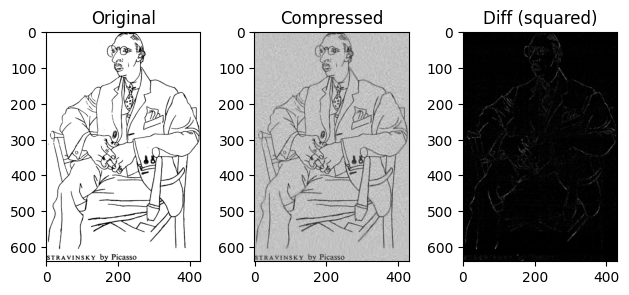

In [13]:
fig, axs = plt.subplots(1, 3)
axs[0].set_title("Original")
axs[0].imshow(strav, cmap="gray")
axs[1].set_title("Compressed")
axs[1].imshow(compressed, cmap="gray")
axs[2].set_title("Diff (squared)")
axs[2].imshow(diff**2, cmap="gray")
fig.tight_layout()
plt.show()

In [14]:
original_size_mb = strav.nbytes / 1024**2
compressed_size_mb = (u[:, :80].nbytes + sigma[:80].nbytes + vt[:80, :].nbytes) / 1024**2
print(f"Original size: {original_size_mb} mb")
print(f"Compressed size: {compressed_size_mb} mb")
print(f"Compression ratio: {compressed_size_mb / original_size_mb}")

Original size: 2.099609375 mb
Compressed size: 0.6536865234375 mb
Compression ratio: 0.31133720930232556
